/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_8"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_20 (Conv2D)                   │ (None, 28, 28, 32)          │             864 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_21 (Conv2D)                   │ (None, 28, 28, 17)          │           4,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_22 (Conv2D)                   │ (None, 28, 28, 13)          │           2,002 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_23 (Conv2D)                   │ (None, 28, 28, 7)           │             826 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_24 (Conv2D)                   │ (None, 28, 28, 3)           │             192 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 8,780 (34.30 KB)

 Trainable params: 8,780 (34.30 KB)

 Non-trainable params: 0 (0.00 B)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step


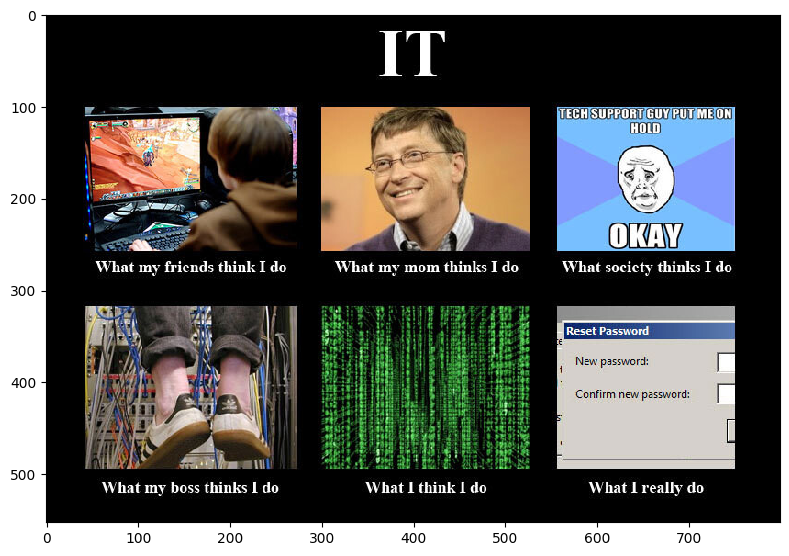

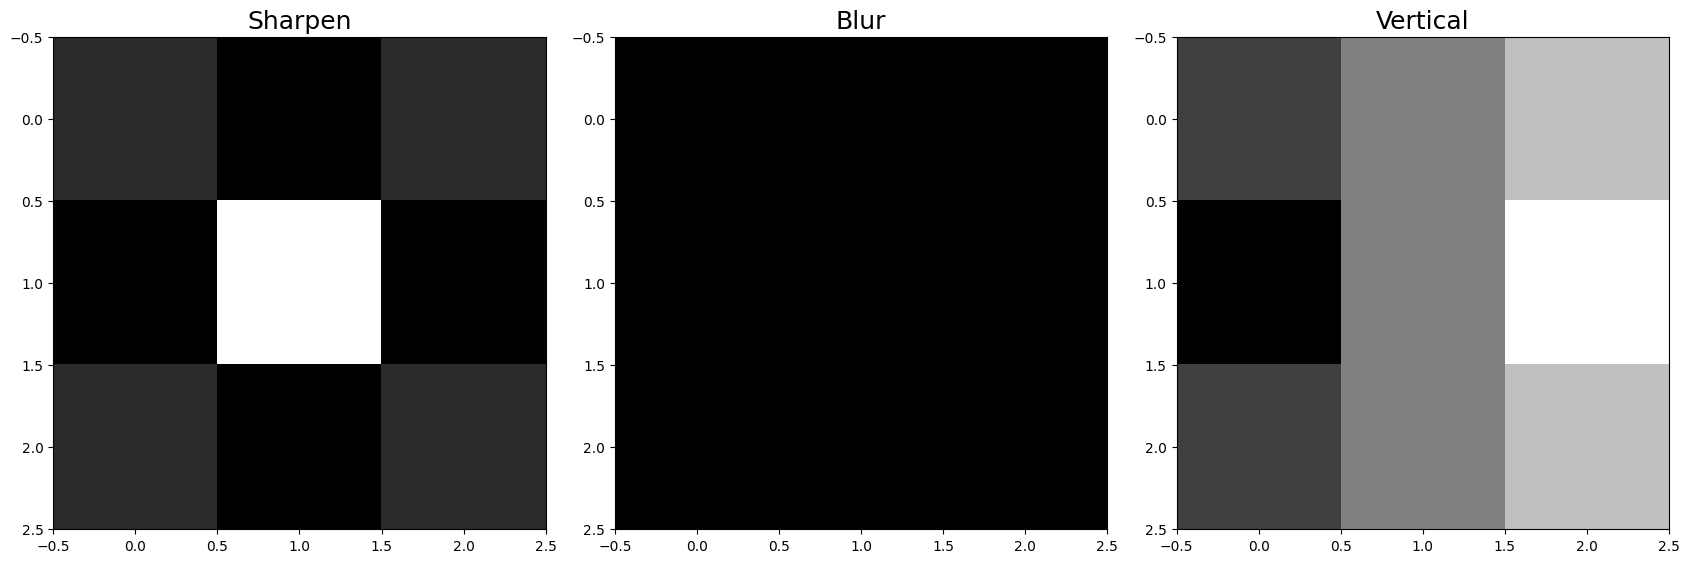

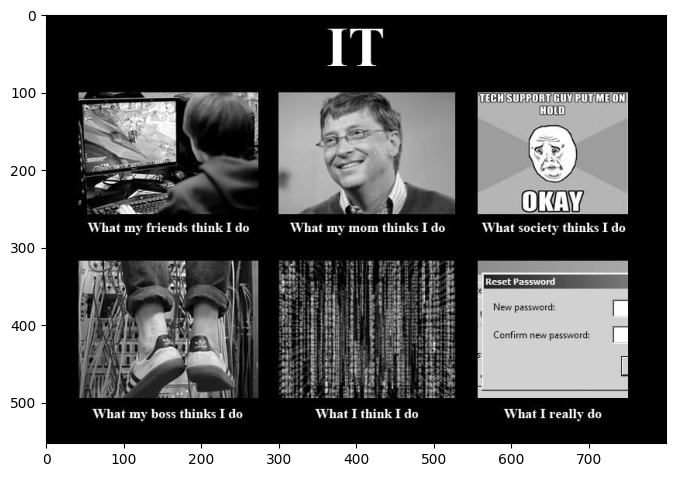

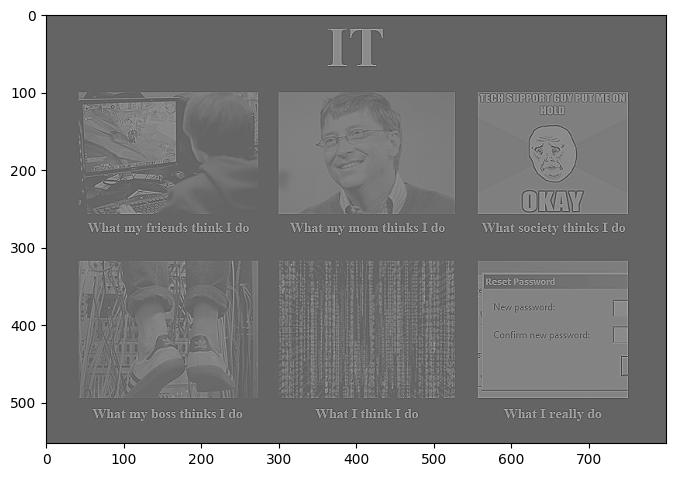

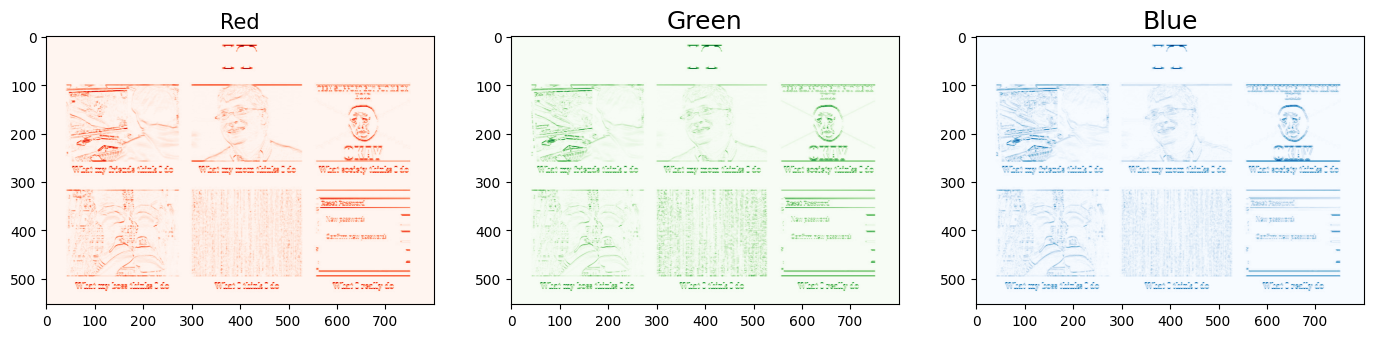

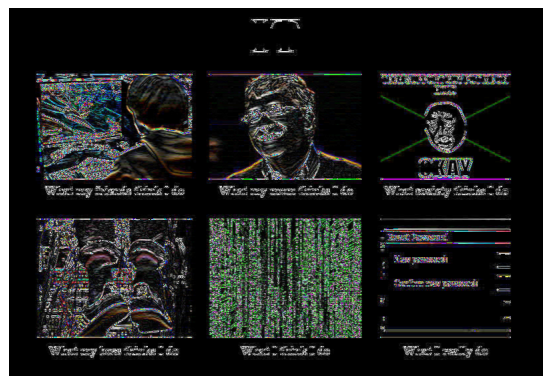

In [21]:
###################################################################################################################################
#CNN
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, AveragePooling2D

#################################CNN Parametrs################################
model1=Sequential()
model1.add(Conv2D(32,(3,3),strides=1,activation='relu', input_shape=(28,28,3),padding='same' , use_bias=False))
model1.add(Conv2D(17,(3,3), activation='relu',padding='same' , use_bias=False))
model1.add(Conv2D(13,(3,3), activation='relu',padding='same' ))
model1.add(Conv2D(7,(3,3), activation='relu',padding='same' ))
model1.add(Conv2D(3,(3,3), activation='relu',padding='same' ))

model1.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

model1.summary()

#################################Pooling################################
import tensorflow as tf
from keras.layers import AveragePooling2D

# Define a 3x3 matrix using TensorFlow constant
x = tf.constant([[1., 2., 3.],
                 [4., 5., 6.],
                 [7., 8., 9.]])

x= tf.reshape(x,[1,3,3,1])


modelp= Sequential()
modelp.add(AveragePooling2D(pool_size=(2, 2), strides=1, padding='valid'))

modelp.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

modelp.predict(x)

################################Filters################################

import numpy as np
import matplotlib.pyplot as plt
from skimage.io import imshow, imread
from skimage.color import rgb2yuv, rgb2hsv, rgb2gray, yuv2rgb, hsv2rgb
from scipy.signal import convolve2d

#Reading Image
dog = imread("/content/6dd8eb23c86dff348865e583498635f8f043003f.jpeg")
plt.figure(figsize=(8,6))
imshow(dog)

import numpy as np
import matplotlib.pyplot as plt

# Filter Matrices
sharpen = np.array([[0, -1, 0],
                    [-1, 5, -1],
                    [0, -1, 0]])

blur = np.array([[0.11, 0.11, 0.11],
                 [0.11, 0.11, 0.11],
                 [0.11, 0.11, 0.11]])

vertical = np.array([[-1, 0, 1],
                     [-2, 0, 2],
                     [-1, 0, 1]])

gaussian = (1/16.0) * np.array([[1, 2, 1],
                                 [2, 4, 2],
                                 [1, 2, 1]])

# Plotting the filters
fig, ax = plt.subplots(1, 3, figsize=(17, 10))

ax[0].imshow(sharpen, cmap='gray')
ax[0].set_title('Sharpen', fontsize=18)

ax[1].imshow(blur, cmap='gray')
ax[1].set_title('Blur', fontsize=18)

ax[2].imshow(vertical, cmap='gray')
ax[2].set_title('Vertical', fontsize=18)

plt.tight_layout()
plt.show()


# Grayscaling Image
dog_gray = rgb2gray(dog)
plt.figure(figsize=(8, 6))
plt.imshow(dog_gray, cmap='gray')

# Function for applying filters
def multi_convolver(image, kernel, iterations):
    for i in range(iterations):
        image = convolve2d(image, kernel, 'same', boundary='fill', fillvalue=0)
    return image

convolved_image = multi_convolver(dog_gray, sharpen, 1)
plt.figure(figsize=(8, 6))
plt.imshow(convolved_image, cmap='gray')


# For colored Image
def convolver_rgb(image, kernel, iterations=1):
    convolved_image_r = multi_convolver(image[:, :, 0], kernel, iterations)
    convolved_image_g = multi_convolver(image[:, :, 1], kernel, iterations)
    convolved_image_b = multi_convolver(image[:, :, 2], kernel, iterations)

    reformed_image = np.dstack((np.rint(abs(convolved_image_r)),
                                 np.rint(abs(convolved_image_g)),
                                 np.rint(abs(convolved_image_b)))) / 255

    fig, ax = plt.subplots(1, 3, figsize=(17, 10))

    ax[0].imshow(abs(convolved_image_r), cmap='Reds')
    ax[0].set_title('Red', fontsize=15)

    ax[1].imshow(abs(convolved_image_g), cmap='Greens')
    ax[1].set_title('Green', fontsize=18)

    ax[2].imshow(abs(convolved_image_b), cmap='Blues')
    ax[2].set_title('Blue', fontsize=18)

    return np.array(reformed_image * 255).astype(np.uint8)

# Can add different filters (defined above) here
convolved_rgb_gauss = convolver_rgb(dog, vertical.T, 1)


plt.figure(num=None, figsize=(8, 6), dpi=86)
plt.imshow(convolved_rgb_gauss, vmin=0, vmax=255)
plt.axis('off')  # Optional: to hide the axes
plt.show()